<a href="https://colab.research.google.com/github/ManJ-PC/HelloCodeSchoolProject/blob/master/Tutorial_VCMI_Tutorials_2022_1_Pytorch_hello_world_to_DL_Tom%C3%A9_Albuquerque_e_Eduardo_Castro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Outline
---

### Motivation

### Basics
* From numpy to pytorch;
* Autograd;
* CUDA tensors;
* The non-existent fit method;
* **Example 1** - CIFAR 10 Classification;

### Intermediate topics

* Custom Datasets;
* Data Augmentation;
* Pretrained Models;
* Custom Layers/Models;
* **Example 2** - Multiclass Classification model for Cervical Cancer risk assessment;

### Closing remarks
* Some tips!
* Next Tutorial.


#Motivation

---

### Deep Learning -  a loose definition

Deep learning is the use models with **many layers**, optimized using **gradient descent** where gradients are computed by **backpropagation**.




#### Many Layered Model:
<center> $ \displaystyle \hat{y} = \sigma(V^T\sigma(W^Tx))$ </center>

#### Gradient Descent:
<center> $ \displaystyle W_{t+1} = W_{t} - \gamma \frac{\partial}{\partial W} C \qquad \qquad V_{t+1} = V_{t} - \gamma \frac{\partial}{\partial V} C $ </center>

#### Backpropagation:
<center> $ \displaystyle \frac{\partial}{\partial V} C = 
\frac{\partial \hat{y}}{\partial V}
\frac{\partial}{\partial \hat{y}} C \qquad \qquad
\frac{\partial}{\partial W} C = 
\frac{\partial z_1}{\partial W}
\frac{\partial \hat{y}}{\partial z_1}
\frac{\partial}{\partial \hat{y}} C$ </center>

\\
<center> $ \displaystyle  $ </center>

<center>

<img src="https://drive.google.com/uc?export=view&id=1Hh-HJwXQdAm2mESorc5V8dFi7I_Hb7b2" width="350" hspace="30">

</br>

</br>

<img src="https://drive.google.com/uc?export=view&id=1Fxm0yU5xiRNZwVlElJm5q0WT9XLLx-bZ" width="350" hspace="30">

<img src="https://drive.google.com/uc?export=view&id=1e9N27Opgm8aocKJ3e2MuUyjVA-e73sX6" width="280" hspace="30">

Figure 1. Bottom-left image was reproduced from [[1](https://medium.com/hackernoon/gradient-descent-aynk-7cbe95a778da)]


**We can do all that in NumPy. Why use PyTorch?**

* Some functions/classes are already implemented (torch.nn);
* Easy to use the GPU (accelaration);
* Automatic differentiation;

**We can do all that in Keras. Why use PyTorch?**
* more control over what is happening since Keras is a "high-level" package;

# Basics
---

## From numpy to pytorch

Manipulating variables in numpy and pytorch is similar:

Numpy | Pytorch
--- | ---
np.array ( [ 1, 2, 3, 4, 5, 6 ] ) | torch.tensor([ 1, 2, 3, 4, 5, 6 ])
np.arange (0, 10) | torch.arange(0, 10)
array.shape | tensor.shape
array1 + array2 | tensor1 + tensor2
np.concatenate | torch.cat
np.max | torch.max
np.exp | torch.exp

In [ ]:
# the same code in numpy and pytorch
import numpy as np
import torch

# create an array
array = np.array([1,2,3,4,5,6], dtype=float)
array = array.reshape((2, 3))
print("1. Array Creation:")
print(array, "\nshape:", array.shape)

print("\n2. Element-wise multiplication and concatenation:")
# element-wise multiplication
array = array * 2
array = np.concatenate((array, array))
print(array)

print("\n3. Maximum of array:")
value = np.max(array)
print(value)

print("\n4. Tensor Creation:")
# create a tensor (try to add requires_grad=True to torch.tensor and run again)
tensor = torch.tensor([1,2,3,4,5,6], dtype=float)
tensor = tensor.reshape((2, 3))
print(tensor, "\nshape:", tensor.shape)

print("\n5. Element-wise multiplication and concatenation:")
# element-wise multiplication
tensor = tensor * 2
tensor = torch.cat((tensor, tensor))
print(tensor)

print("\n6. Maximum of tensor:")
value = torch.max(tensor)
print(value)

print("\n7. Back to numpy:")
print(tensor.detach().cpu().numpy())

1. Array Creation:
[[1. 2. 3.]
 [4. 5. 6.]] 
shape: (2, 3)

2. Element-wise multiplication and concatenation:
[[ 2.  4.  6.]
 [ 8. 10. 12.]
 [ 2.  4.  6.]
 [ 8. 10. 12.]]

3. Maximum of array:
12.0

4. Tensor Creation:
tensor([[1., 2., 3.],
        [4., 5., 6.]], dtype=torch.float64) 
shape: torch.Size([2, 3])

5. Element-wise multiplication and concatenation:
tensor([[ 2.,  4.,  6.],
        [ 8., 10., 12.],
        [ 2.,  4.,  6.],
        [ 8., 10., 12.]], dtype=torch.float64)

6. Maximum of tensor:
tensor(12., dtype=torch.float64)

7. Back to numpy:
[[ 2.  4.  6.]
 [ 8. 10. 12.]
 [ 2.  4.  6.]
 [ 8. 10. 12.]]


### Practise

Consider the following regression model:

$$\hat{y}=w^Tx, \qquad x, w\in \mathbb{R}^d$$


By the linear least squares method we know that the following solution minimizes the sum of the squarred errors for all points:

$$w = (X^TX)^{-1}X^Ty$$

Can you implement that in pytorch?



tensor([-0.8226])


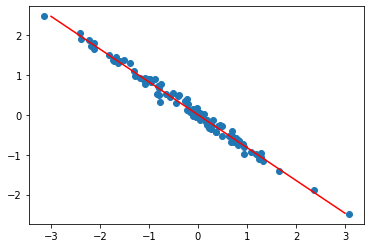

In [ ]:
import torch
from matplotlib import pyplot as plt

# generate toy data
n = 100
d = 1
trans = torch.randn(d)
error = torch.randn(n) * 0.1
X = torch.randn(n, d)
y = torch.matmul(X, trans) + error

plt.scatter(X.numpy(), y.numpy())

# your solution goes here
XX_inv = torch.inverse(torch.matmul(X.T, X))
Xy = torch.matmul(X.T, y)
w = torch.matmul(XX_inv, Xy)

print(w)
axis_x = torch.linspace(-3, 3, 50)
plt.plot(axis_x, w * axis_x, c="r")


Pytorch variables, however, are different in at least two aspects.

## Autograd

First, *PyTorch operations* have *gradient operations* associated with them. 
If you define a python function composed of PyTorch operations, you can automatically obtain the tensors' gradients. This saves you time as you do not have to define a gradient function. Also, *PyTorch tensors* have a .grad attribute, which accumulates gradients for that variable.

So, if you want to compute $\frac{\partial}{\partial W} C $ for the following equation:

<center> $ \displaystyle W_{t+1} = W_{t} - \gamma \frac{\partial}{\partial W} C $ </center>

you can define your $C$ as a python function composed of torch operations, and $W$ is a PyTorch tensor;

(more on this: https://pytorch.org/tutorials/beginner/blitz/autograd_tutorial.html)

In [ ]:
import torch
from torch.autograd import grad

w = torch.tensor(3, dtype=float, requires_grad=True)
result = torch.pow(w, 2.0)

print("This is also in numpy:")
print("w:", w)
print("w^2:", result)

print("\nThis is not in numpy:")
# the gradient function d(result)/dw
print("The output of the gradient function:", grad(outputs=result, inputs=w))


# Alternatively you can do this:
w = torch.tensor(3, dtype=float, requires_grad=True)
loss = torch.pow(w, 2.0)
loss.backward()
# the accumulated gradient after the backward pass
print(".grad after backward:", w.grad)
# now for each tensor with requires_grad=True
# grad(outputs=loss, inputs=tensor) will be called and accumulated in the .grad attribute

This is also in numpy:
w: tensor(3., dtype=torch.float64, requires_grad=True)
w^2: tensor(9., dtype=torch.float64, grad_fn=<PowBackward0>)

This is not in numpy:
The output of the gradient function: (tensor(6., dtype=torch.float64),)
.grad after backward: tensor(6., dtype=torch.float64)


## CUDA variables

Second, PyTorch tensors may be stored in the CPU memory (RAM) or GPU memory. When performing an operation, all tensors used in the process must be stored in the same place. Otherwise, an error will be raised. If they are stored in the GPU, you will use this unit to perform the computation. Otherwise, the CPU will be used. The same goes for machines with multiple GPUs. The *.to* method can be used to copy variables from different devices. Devices are called "CPU" for the CPU and "cuda:n" for the nth GPU.

A useful trick is to write your code with a **device** variable. In this way, if you want to run in CPU or GPU, you can simply change this variable. Another useful trick is that, for models, *model.to* works for all parameters of the network.

(more on this: https://pytorch.org/docs/stable/notes/cuda.html)

In [ ]:
import torch
x = torch.tensor(1)
y = torch.tensor(2)
print(x+y)

x = x.to("cuda:0")
y = y.to("cuda:0")
print(x+y)

# Some useful code (if you share a machine with your collegues)
GPU_TO_USE="0"
device = f"cuda:{GPU_TO_USE}" if torch.cuda.is_available() else "cpu"
print("DEVICE:", device)
x = x.to(device)
print(x)

tensor(3)
tensor(3, device='cuda:0')
DEVICE: cuda:0
tensor(1, device='cuda:0')


## The non-existent fit method

We will now use pytorch to solve the previous example but using gradient descent instead of an analytic solution.

**Homework:**
 * Can you solve this example but using a GPU?

**Optimizer Code:**
```
opt = torch.optim.SGD([w], learning_rate)  # Initialize the optimizer with your parameters
(...)
opt.zero_grad()   # Zero-out the gradients of the parameters;
(...)             # Use the data and model to compute your loss value;
error.backward()  # Compute the gradients by backprogation;
opt.step()        # Perform gradient descent;
```


**from (CUDA and requires_grad=True) to numpy Code:**
```
w  # torch tensor
w.detach()  # torch tensor without gradient and past operations
w.cpu()   # torch tensor copied to cpu
w.numpy()    # numpy array
```

tensor([-1.0066])


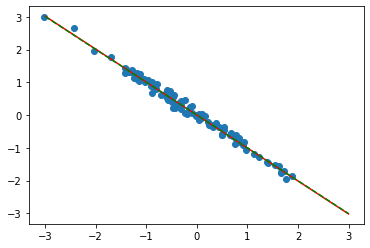

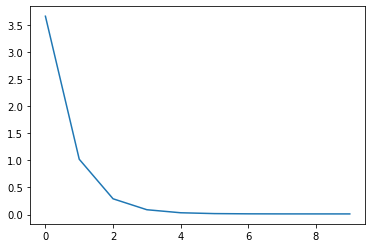

In [ ]:
import torch
from matplotlib import pyplot as plt

# generate toy data
n = 100
d = 1
trans = torch.randn(d)
error = torch.randn(n) * 0.1
X = torch.randn(n, d)
y = torch.matmul(X, trans) + error

plt.scatter(X.numpy(), y.numpy())

# analitic
XX_inv = torch.inverse(torch.matmul(X.T, X))
Xy = torch.matmul(X.T, y)
w_analitic = torch.matmul(XX_inv, Xy)

print(w_analitic)
axis_x = torch.linspace(-3, 3, 50)
plt.plot(axis_x, w_analitic * axis_x, c="r")

# gradient descent
iterations = 10
learning_rate = 0.25
w_desc = torch.randn(1, requires_grad=True)
opt = torch.optim.SGD([w_desc], learning_rate)
loss_history = []

for i in range(iterations):
  # optimization
  opt.zero_grad()
  output = torch.matmul(X, w_desc)
  loss = torch.mean((y-output)**2)
  loss.backward()
  opt.step()

  # saving results
  loss_history.append(loss.detach().cpu().numpy().copy())

plt.plot(axis_x, (w_desc * axis_x).detach(), ls="--", c="g")
plt.figure()
plt.plot(loss_history)

If you are familiar with Keras and Sklearn you know that to optimize a model you just call something like this:
```
model.fit(X, y)
```

Internally, Keras and Sklearn (when optimizing MLPs) are doing something similar to the previous example. In PyTorch, this looks something like this:

```
def train_epoch():
    # lists that will save the training progression of the model  
    train_losses = []
    val_losses = []

    # model in train mode - change the behaviour of dropout and batchnorm layers
    model.train()

    # run the training loop for all batches in epoch
    for X, y in train_loader:
      
      X, y = X.to(device), y.to(device)  # data to device (gpu if using one)
      opt.zero_grad()                    # set gradients to zero
      y_ = model(X)                      # compute model output  
      loss = loss_fn(y_, y)              # compute training loss for batch
      loss.backward()                    # autograd/backprop magic!
      opt.step()                         # run one step of gradient descend
      loss = loss.detach().cpu().numpy() # reads - remove_gradient().to_cpu().to_numpy_array()
      train_losses.append(loss)          # save current loss

    # model in eval mode - change the behaviour of dropout and batchnorm layers
    model.eval()

    # computation within this block does not require gradients (we are in validation)
    with torch.no_grad():

      # run validation loop for all batches in epoch 
      for X, y in val_loader:
        X, y = X.to(device), y.to(device)
        y_ = model(X)
        loss = loss_fn(y_, y)           # notice we do not call backward in validation
        loss = loss.detach().cpu().numpy()
        val_losses.append(loss)
    return np.mean(train_losses), np.mean(val_losses)

for epoch in range(n_epochs):
    print(epoch, *train_epoch())
```


## Example 1: CIFAR10 Classification with Deep Neural Networks

We finish the basics with an exercise. Use the provided examples below to define your data, model, loss function, and optimizer. Complete the code below and train your classifier in PyTorch for the CIFAR10 dataset. You will find that although you can reinvent the wheel in PyTorch, usually you do not need to do so.


<center>
<img src="https://drive.google.com/uc?export=view&id=147m8A-V__JRsFA68K3Lo-WvOyu9S2D3d" width="550" hspace="30">
</center>

## Data
For loading and processing image data, the Torchvision package is handy. It contains most of the transformations you will ever use. Take a look here:

https://pytorch.org/docs/stable/torchvision/transforms.html

You can also use Torchvision to load "famous" datasets or to load your images directly from a folder. Alternatively, you may implement your own Dataset. We will look at this in a second, but further information can be found here:

https://pytorch.org/tutorials/beginner/data_loading_tutorial.html

Finally, the dataloader object handles things like multi-threading, batch creation, and data shuffling, etc. Most of the time, you will use the Pytorch dataloader, but there is useful information in the previous link if you want to look at it.

**Why do we use batches and what is the batch size?**
Training would require a lot more time if, for each gradient descent step we would need to feed all the training inputs to the model. By providing only a small batch of data in each step, we guaranty we have a sufficiently good approximation of the gradient, with a much smaller computational cost. This is the difference between classic gradient descent and stochastic gradient descent.

**Transform object - useful for standarization/data augmentation**
```
transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize([(0.5, 0.5, 0.5),
                                                      (0.5, 0.5, 0.5)])
```
**Dataset object**
```
# torchvision dataset
dataset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)

# load from folder
"""
 path should look like this
dog/xxx.png
dog/xxy.png
dog/xxz.png
cat/123.png
cat/nsdf3.png
cat/asd932_.png
"""
dataset = torchvision.datasets.ImageFolder(path, transform=transform)

# custom dataset - here you define how to read your data
dataset = myDataset(<your arguments>)
```

**Train, Validation and Test Split**

You can use the utils.data module to split your dataset in train, validation and test. This way you can correctly evaluate your model in a subset of unseen data. Other types of division exist (e.g. K-fold validation) but for now this will suffice.
```
torch.utils.data.random_split(dataset, [train_length, val_length, test_length])
```


**Dataloader**
```
loader = torch.utils.data.DataLoader(dataset, batch_size=4, shuffle=True, num_workers=2)
```



## Model
When building a model in PyTorch, **torch.nn** is your best friend:

https://pytorch.org/docs/stable/nn.html

It contains all layers you will use in your work except if you are researching something new, yet to be implemented. Layers, sub-layers, and models extend the nn.Module class. For this, you need to implement the **forward** method, which is called when you do something like "model(X)" or "model.conv1(X)", and returns the result of the operation. Weights are initialized at layer level. If you build a custom one, you are responsible by initializing the weights.

The example below shows how to implement a simple model. In this case, we use the nn.Sequential module which implements the **forward** method by composing all layers sequentially. Later we will write our custom model in PyTorch by extending nn.Module.

```
model = nn.Sequential(nn.Conv2d(3, 6, 5),nn.ReLU(),nn.MaxPool2d(2, 2),
                      nn.Conv2d(6, 16, 5),nn.ReLU(),nn.MaxPool2d(2, 2),
                      nn.Linear(16 * 5 * 5, 120),nn.ReLU(),
                      nn.Linear(120, 84),nn.ReLU(),
                      nn.Linear(84, 10))
```





## Optimizer

The torch.optim package implements several optimizers used to train deep neural networks. The two most famous examples are probably stochastic gradient descent with momentum and the Adam algorithm.
```
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)
```
```
optimizer = optim.Adam(model.parameters(), lr=0.0001)
```

## Loss function

The torch.nn module also implements several loss functions for you to use in your models:
```
loss_fn = torch.nn.CrossEntropyLoss()
```
```
loss_fn = torch.nn.MSELoss()  # the mean squarred error is not used for classification!
```

In [ ]:
import torch
import torchvision
import torchvision.transforms as transforms
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import numpy as np
from matplotlib import pyplot as pl

GPU_TO_USE="0"
device = f"cuda:{GPU_TO_USE}" if torch.cuda.is_available() else "cpu"

transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])
trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
train_loader = torch.utils.data.DataLoader(trainset, batch_size=256, shuffle=True, num_workers=4)

testset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)
val_loader = torch.utils.data.DataLoader(testset, batch_size=256, shuffle=False, num_workers=4)

classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

model = nn.Sequential(
          nn.Conv2d(3, 6, 5),
          nn.ReLU(),
          nn.MaxPool2d(2, 2),
          nn.Conv2d(6, 16, 5),
          nn.ReLU(),
          nn.MaxPool2d(2, 2),
          nn.Flatten(),
          nn.Linear(16 * 5 * 5, 120),
          nn.ReLU(),
          nn.Linear(120, 84),
          nn.ReLU(),
          nn.Linear(84, 10)
        )
model = model.to(device)
loss_fn = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters())

print(model)

def train_epoch():
    train_losses = []
    val_losses = []
    
    # used for accuracy computation
    train_correct = 0
    train_total = 0
    val_correct = 0
    val_total = 0
 
    print("\nTrain")
    model.train()    
    for i, (X, y) in enumerate(train_loader):
      print("\rtrain: {:.0%}".format(i/len(train_loader)), end="", flush=True)
      X, y = X.to(device), y.to(device)
      optimizer.zero_grad()
      y_ = model(X)
      loss = loss_fn(y_, y)
      loss.backward()
      optimizer.step()
      
      train_losses.append(loss.detach().cpu().numpy())

      # compute valus for accuracy
      _, predicted = torch.max(y_.data, 1)
      train_correct += (predicted == y).sum().item()
      train_total += y.size(0)
      
 
    print("\nValidation")
    model.eval()
    with torch.no_grad():
      for i, (X, y) in enumerate(val_loader):
        print("\rvalid: {:.0%}".format(i/len(val_loader)), end="", flush=True)
        X, y = X.to(device), y.to(device)
        y_ = model(X)
        loss = loss_fn(y_, y)
        val_losses.append(loss.detach().cpu().numpy())

        _, predicted = torch.max(y_.data, 1)
        val_correct += (predicted == y).sum().item()
        val_total += y.size(0)

    return  np.mean(train_losses), np.mean(val_losses),\
    train_correct/train_total,val_correct/val_total
 
n_epochs = 10
for epoch in range(n_epochs):
    train_loss, valid_loss, train_acc, val_accuracy = train_epoch()
    print(f"\nEpoch: {epoch}\n",
          f"\ttrain loss: {train_loss}\n",
          f"\tvalid loss: {valid_loss}\n",
          f"\ttrain acc: {train_acc*100}%\n",
          f"\tvalid acc {val_accuracy*100}%",)

Files already downloaded and verified


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


Files already downloaded and verified
Sequential(
  (0): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
  (1): ReLU()
  (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (3): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (4): ReLU()
  (5): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (6): Flatten(start_dim=1, end_dim=-1)
  (7): Linear(in_features=400, out_features=120, bias=True)
  (8): ReLU()
  (9): Linear(in_features=120, out_features=84, bias=True)
  (10): ReLU()
  (11): Linear(in_features=84, out_features=10, bias=True)
)

Train
train: 99%
Validation
valid: 98%
Epoch: 0
 	train loss: 1.846841812133789
 	valid loss: 1.5745843648910522
 	train acc: 32.46%
 	valid acc 42.46%

Train
train: 99%
Validation
valid: 98%
Epoch: 1
 	train loss: 1.500867247581482
 	valid loss: 1.4127689599990845
 	train acc: 45.32%
 	valid acc 48.54%

Train
train: 99%
Validation
valid: 98%
Epoch: 2
 	train loss: 1.3823989629745483
 	valid lo

Below are some examples simple to obtain in PyTorch, which may help your research or even debug potential problems with your model. Due to PyTorch's NumPy-like nature, investigating weights, activations, gradients, etc., is straightforward.

Notice that we can convert these tensors to NumPy and plot them with matplotlib. This enables you to really look at your model during training and after.


 Weights
0 torch.Size([6, 3, 5, 5]) tensor(-1.1652, device='cuda:0', grad_fn=<MinBackward1>) tensor(1.4681, device='cuda:0', grad_fn=<MaxBackward1>) tensor(0.0116, device='cuda:0', grad_fn=<MeanBackward0>) tensor(0.1493, device='cuda:0', grad_fn=<VarBackward0>)
1 None
2 None
3 torch.Size([16, 6, 5, 5]) tensor(-0.9129, device='cuda:0', grad_fn=<MinBackward1>) tensor(0.9452, device='cuda:0', grad_fn=<MaxBackward1>) tensor(-0.0321, device='cuda:0', grad_fn=<MeanBackward0>) tensor(0.0507, device='cuda:0', grad_fn=<VarBackward0>)
4 None
5 None
6 None
7 torch.Size([120, 400]) tensor(-0.4768, device='cuda:0', grad_fn=<MinBackward1>) tensor(0.5064, device='cuda:0', grad_fn=<MaxBackward1>) tensor(-0.0108, device='cuda:0', grad_fn=<MeanBackward0>) tensor(0.0083, device='cuda:0', grad_fn=<VarBackward0>)
8 None
9 torch.Size([84, 120]) tensor(-0.4186, device='cuda:0', grad_fn=<MinBackward1>) tensor(0.3568, device='cuda:0', grad_fn=<MaxBackward1>) tensor(-0.0233, device='cuda:0', grad_fn=<MeanBackw

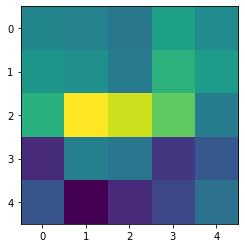

In [ ]:
from matplotlib import pyplot as plt
print("\n Weights")
weights = []
for layer in model:
  if hasattr(layer, "weight"):
    weights.append(layer.weight)
  else:
    weights.append(None)

for i, w in enumerate(weights):
  if w!= None:
    print(i, w.shape, w.min(), w.max(), w.mean(), w.var())
  else:
    print(i, w)
plt.imshow(weights[0][0, 0].cpu().detach())

print("\n Activations")
for i, (X, y) in enumerate(train_loader):
  break
x = X.to(device)
for i, layer in enumerate(model):
  x = layer(x)
  print(i, x.shape, x.min(), x.max(), x.mean(), x.var())

# view gradients
print("\n Gradients")
for i, (X, y) in enumerate(train_loader):
  X, y = X.to(device), y.to(device)
  optimizer.zero_grad()
  y_ = model(X)
  loss = loss_fn(y_, y)
  loss.backward()
  break

grads = []
for layer in model:
  if hasattr(layer, "weight"):
    grads.append(layer.weight._grad)
  else:
    grads.append(None)

for i, g in enumerate(grads):
  if g!= None:
    print(i, g.shape, g.min(), g.max(), g.mean(), g.var())
  else:
    print(i, g)

# Intermediate Topics
---



## Custom Datasets

To write a custom Dataset in Pytorch, you need to create a class that extends the torch.utils.data.Dataset class and implement two methods:

* \_\_len__ so that len(dataset) returns the dataset's size.
* \_\_getitem__ to support the indexing such that dataset[i] can be used to get the ith sample

Let's look at the following very simple example:

```
from torch.utils.data import Dataset

class MyDataset(Dataset):
    def __init__(self, type, transform, K, fold):
        #load file with images/labels
        self.X, self.Y = pickle.load(open(f'k{K}.pickle', 'rb'))[fold][type]
        #get transforms
        self.transform = transform

    def __getitem__(self, i):
        #iterate over each image/label during train/test cycles
        #apply transforms
        X = self.transform(self.X[i])
        Y = self.Y[i]
        return X, Y

    def __len__(self):
        return len(self.X)
```

Although this example may seem trivial, we will actually use it later for our classification experiment.

It is common for Datasets to have a transform attribute that determines how to process data in the input pipeline. This allows you to rotate, resize, normalize, etc., the input data. The transform attribute is often a **torchvision.transforms.Compose** object with many sub transforms. Much like the **nn.Sequential** class enables you to have a pipeline that sequentially processes the data. You can also create your transforms.

In this pipeline, it is widespread to first transform the data to a PIL image, use the PIL image functions for data augmentation, and finally convert it to a tensor and normalize it. Take a look at the following example:

```
import torchvision.transforms as transforms
import torchvision.transforms.functional as TF
import random

train_transforms = transforms.Compose([
    transforms.ToPILImage(),
    Random90kRot(),
    transforms.Resize((224, 224)), 
    transforms.RandomCrop(128),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225))
])

class Random90kRot():
    """Rotate by one of the given angles with equal probability."""
    def __init__(self, angles=[0, 90, 180, 270]):
        self.angles = angles

    def __call__(self, x):
        angle = random.choice(self.angles)
        return TF.rotate(x, angle, fill=(0,))
```

About the Python Image Library or Pillow: this is a library that enables you to open, manipulate, and save images with python. Although it is not used directly in our examples, some transforms from Torchvision are based on this package. You may look at this tutorial if this framework is of interest to you:

https://pillow.readthedocs.io/en/stable/handbook/tutorial.html

The package intersects with similar packages such as ScikitImage and Opencv, although some functions may be present in only some of them.

## Data Augmentation - Albumentations

```
#or using Albumentations
import albumentations as A
from albumentations.pytorch import ToTensorV2

train_transforms = A.Compose([
    A.Resize(224, 224), 
    A.RandomCrop(128, 128),
    A.HorizontalFlip(),
    A.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
    ToTensorV2()
])

```

## Pretrained Models

The torchvision package provides you well-known pretained models, which you can use for different tasks, including **classification**, **segmentation** and **object detection**. Generally, pretrained models require less time to optimize to new tasks and usually perform better for small and medium-sized datasets. Often, the last layer of the models are substituted for a new one. We can optimize the last few layers of the model (fine-tuning), or the whole model. Fine-tuning is based on the idea that early layers contain general/low-level features which are useful for a multitude of tasks, while the "later" ones are more specific to the task which the model is trying to solve.

To look deeper into the available models: https://pytorch.org/vision/stable/models.html

For classification, well-known models include:

```
import torchvision.models as models
resnet50 = models.resnet50(pretrained=True)
alexnet = models.alexnet(pretrained=True)
vgg16 = models.vgg16(pretrained=True)
```

Notice that these models were trained for images of size $224\times 224$.

## Custom Layers/Models;


Writing custom models is easy in PyTorch.
You need to:


1.   Extend the nn.Module class
2.   Implement the \_\_init__ method
3.   Implement the forward method

You can also use nn.Module's inside your nn.Module. This is how available architectures are implemented in PyTorch.

Let's look at the following example:

```
from torch import nn

class Model_example(nn.Module):
    def __init__(self, pretrained_model, n_outputs):
        super().__init__()
        self.n_outputs = n_outputs
        model = getattr(models, pretrained_model)(pretrained=True)
        #remove last layer from pre-trained model 
        model = nn.Sequential(*tuple(model.children())[:-1])
        #get last dimension of the model
        last_dimension = torch.flatten(model(torch.randn(1, 3, 224, 224))).shape[0]
        self.model = nn.Sequential(
            model,
            nn.Flatten(),
            nn.Dropout(0.2),
            nn.Linear(last_dimension, 512),
            nn.Dropout(0.2),
            nn.ReLU(),
            nn.Linear(512, 256),
            nn.ReLU(),
            nn.Linear(256, n_outputs)
        )

    def forward(self, x):
        return self.model(x)
```

By doing this you can use functions like:
* model(x)  # forward
* torch.save(model.state_dict(), path)  # save model
* model.load_state_dict(torch.load(path))  # load model
* model.parameters()  # for the optimizer for example
* model.train()
* model.eval()


## Example 2 - Multiclass Classification model for Cervical Cancer risk assessment;

Now let's look at the following example.
It is based on this code and covers the main topics on a classification task:

https://github.com/tomealbuquerque/ordinal-losses

## Target
![](https://drive.google.com/uc?export=view&id=1ppNapl6i1a11ZgzLNZyoFTlncCmeNw7i)


![](https://drive.google.com/uc?export=view&id=1EUH2MJgtmUj7_JccGns_I7k5zw_zQ1vU)


In [ ]:
#package to import google drive files to colab
!pip install PyDrive

In [ ]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# 1. Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

#2. Get the file
downloaded = drive.CreateFile({'id':"1G90PIYhDFOpYdAtKG70_0OWmvwuVSHD2"})   # replace the id with id of file you want to access
downloaded.GetContentFile('k7.pickle')

Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/googleapiclient/discovery_cache/file_cache.py", line 33, in <module>
    from oauth2client.contrib.locked_file import LockedFile
ModuleNotFoundError: No module named 'oauth2client.contrib.locked_file'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/googleapiclient/discovery_cache/file_cache.py", line 37, in <module>
    from oauth2client.locked_file import LockedFile
ModuleNotFoundError: No module named 'oauth2client.locked_file'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/googleapiclient/discovery_cache/__init__.py", line 44, in autodetect
    from . import file_cache
  File "/usr/local/lib/python3.7/dist-packages/googleapiclient/discovery_cache/file_cache.py", line 41, in <module>
    "file_cach

In [ ]:
#Main pipeline for multiclass classification
#import libraries
import numpy as np
from time import time
import torch
from torch import nn, optim
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader, Subset
from tqdm import tqdm
from sklearn.model_selection import KFold
from torchvision import models, transforms
import pickle


device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

#hyperparameters to tune
#number of classes 
K = 7
#fold (in this case we have 3 k-folds) 
fold = 0
#number of images per mini-batch
batchsize=64
#epochs to finish the train 
epochs=10
#learning rate
lr=1e-4
#pre-trained architecture
architecture='mobilenet_v2'

#Prepare dataset loader
class MyDataset(Dataset):
    def __init__(self, type, transform, K, fold):
        self.X, self.Y = pickle.load(open(f'k{K}.pickle', 'rb'))[fold][type]
        self.transform = transform

    def __getitem__(self, i):
        X = self.transform(self.X[i])
        Y = self.Y[i]
        return X, Y

    def __len__(self):
        return len(self.X)

#train transforms
train_transforms = transforms.Compose([
    transforms.ToPILImage(),
    transforms.RandomAffine(180, (0, 0.1), (0.9, 1.1)),
    transforms.RandomHorizontalFlip(),
    transforms.RandomVerticalFlip(),
    transforms.ColorJitter(saturation=(0.5, 2.0)),
    transforms.ToTensor(),
    transforms.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225))
])

#val transforms
val_transforms = transforms.Compose([
    transforms.ToTensor(), 
    transforms.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225))
])

#dataloaders
tr_ds = MyDataset('train', train_transforms, K, fold)
tr = DataLoader(tr_ds, batchsize, True)#random selection of images - True
ts_ds = MyDataset('test', val_transforms, K, fold)
ts = DataLoader(ts_ds, batchsize)

#loss
ce = nn.CrossEntropyLoss()

# Model
class Base(nn.Module):
    def __init__(self, pretrained_model, n_outputs):
        super().__init__()
        self.n_outputs = n_outputs
        model = getattr(models, pretrained_model)(pretrained=True) #using transfer learning from a pretrained model - True
        model = nn.Sequential(*tuple(model.children())[:-1])
        last_dimension = torch.flatten(model(torch.randn(1, 3, 224, 224))).shape[0]
        self.model = nn.Sequential(
            model,
            nn.Flatten(),
            nn.Dropout(0.2),
            nn.Linear(last_dimension, 512),
            nn.Dropout(0.2),
            nn.ReLU(),
            nn.Linear(512, 256),
            nn.ReLU(),
            nn.Linear(256, n_outputs)
        )

    def forward(self, x):
        return self.model(x)

    def loss(self, Yhat, Y):
        return ce(Yhat, Y)

    def to_proba(self, Yhat):
        return F.softmax(Yhat, 1)

    def to_classes(self, Phat):
        return Phat.argmax(1)

#test cycle
def test(val):
    model.eval()
    val_avg_acc = 0
    with torch.no_grad():
      for X, Y in tqdm(val):
          X = X.to(device)
          Y = Y.to(device, torch.int64)
          Yhat = model(X)
          Khat = model.to_classes(model.to_proba(Yhat))
          val_avg_acc += (Y == Khat).float().mean() / len(val)
    return val_avg_acc

#train cycle
def train(tr, val, epochs=epochs, verbose=True):
    for epoch in range(epochs):
        if verbose:
            print(f'* Epoch {epoch+1}/{epochs}')
        tic = time()
        model.train()
        avg_acc = 0
        avg_loss = 0
        for X, Y in tqdm(tr):
            X = X.to(device)
            Y = Y.to(device, torch.int64)
            opt.zero_grad()
            Yhat = model(X)
            loss = model.loss(Yhat, Y)
            loss.backward()
            opt.step()
            Khat = model.to_classes(model.to_proba(Yhat))
            avg_acc += (Y == Khat).float().mean() / len(tr)
            avg_loss += loss / len(tr)
        dt = time() - tic
        out = ' - %ds - Loss: %f, Acc: %f' % (dt, avg_loss, avg_acc)
        if val:
            model.eval()
            out += ', Test Acc: %f' % test(val)
        if verbose:
            print(out)
        scheduler.step(avg_loss)

#get output probabilities from the model
def predict_proba(data):
    model.eval()
    Phat = []
    with torch.no_grad():
        for X, _ in data:
            phat = model.to_classes(model.to_proba(model(X.to(device))))
            Phat += list(phat.cpu().numpy())
    return Phat

#Give to the model the architecture and number of classes (K)
model = Base(architecture, K)
#put the model on 'GPU' or 'CPU'
model = model.to(device)
#Define optimizer and scheduler 
opt = optim.Adam(model.parameters(), lr)
scheduler = optim.lr_scheduler.ReduceLROnPlateau(opt, verbose=True)


Downloading: "https://download.pytorch.org/models/mobilenet_v2-b0353104.pth" to /root/.cache/torch/hub/checkpoints/mobilenet_v2-b0353104.pth


  0%|          | 0.00/13.6M [00:00<?, ?B/s]

###Train Model

In [ ]:
#Start the training process
train(tr, ts)

* Epoch 1/10


100%|██████████| 5/5 [00:00<00:00,  5.73it/s]


 - 8s - Loss: 0.514571, Acc: 0.806071, Test Acc: 0.672125
* Epoch 2/10


100%|██████████| 5/5 [00:00<00:00,  5.73it/s]


 - 8s - Loss: 0.527410, Acc: 0.787857, Test Acc: 0.604875
* Epoch 3/10


100%|██████████| 5/5 [00:00<00:00,  7.20it/s]


 - 8s - Loss: 0.508951, Acc: 0.791205, Test Acc: 0.667375
* Epoch 4/10


100%|██████████| 5/5 [00:00<00:00,  5.90it/s]


 - 9s - Loss: 0.488510, Acc: 0.806830, Test Acc: 0.682875
* Epoch 5/10


100%|██████████| 5/5 [00:00<00:00,  7.29it/s]


 - 7s - Loss: 0.440283, Acc: 0.825312, Test Acc: 0.667250
* Epoch 6/10


100%|██████████| 5/5 [00:00<00:00,  7.21it/s]


 - 7s - Loss: 0.432930, Acc: 0.808661, Test Acc: 0.684125
* Epoch 7/10


100%|██████████| 5/5 [00:00<00:00,  7.26it/s]


 - 7s - Loss: 0.435513, Acc: 0.837545, Test Acc: 0.658875
* Epoch 8/10


100%|██████████| 5/5 [00:00<00:00,  7.27it/s]


 - 7s - Loss: 0.377504, Acc: 0.870357, Test Acc: 0.681875
* Epoch 9/10


100%|██████████| 5/5 [00:00<00:00,  7.23it/s]


 - 7s - Loss: 0.307256, Acc: 0.886473, Test Acc: 0.666875
* Epoch 10/10


100%|██████████| 5/5 [00:00<00:00,  7.25it/s]


 - 7s - Loss: 0.292446, Acc: 0.877634, Test Acc: 0.678000


###Evaluate Model Performance

Classification Report:
               precision    recall  f1-score   support

           0       0.83      1.00      0.91        25
           1       1.00      0.74      0.85        23
           2       0.70      0.85      0.77        33
           3       0.68      0.84      0.75        61
           4       0.44      0.40      0.42        48
           5       0.68      0.55      0.61        66
           6       0.67      0.64      0.65        50

    accuracy                           0.68       306
   macro avg       0.71      0.71      0.71       306
weighted avg       0.68      0.68      0.67       306

Confusion Matrix:


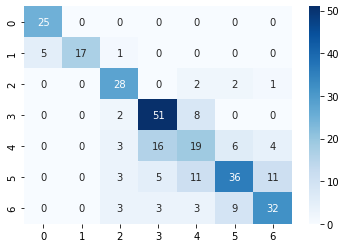

In [ ]:
#evaluate model performance
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

y_pred=predict_proba(ts)
_,y_true = pickle.load(open(f'k{K}.pickle', 'rb'))[fold]['test']
print('Classification Report:\n', classification_report(y_true, y_pred))

print('Confusion Matrix:')
cm = sns.heatmap(confusion_matrix(y_true, y_pred), annot=True, cmap='Blues')
plt.show()

# Closing remarks


## Some tips!

* save your experiments - training takes time, and sometimes you want to check something later or reuse your model. As such, you should save your model, hyperparameters, data, training curves, etc., and keep it.

**Example:** you trained a few models, evaluated their accuracy, and you got rid of them. Later, you were asked to assess the rocAUC too. If you discarded your model, you would have to retrain, which can take a few days.

* the devil is in the details - many things in deep learning depend on little details. Errors are often silent. Due to this, you should adopt a defensive posture and evaluate and debug intermediate results as much as possible. In the end, you will save time.

* do not reinvent the wheel unless you are having fun - many of the things you need are either implemented on PyTorch or other repositories. If you are implementing something by yourself, make sure you are wasting time because you want to.

## Next Tutorial

04/03 - 21:00

**Topics:** GANs and VAEs and Metric Learning

Pedro Neto

Eduardo Castro

<center><h1>Thank you!!</h1></center>
